# Tarea: Teoría cuántica básica, Observables y Medidas

## Ejercicio 1:
El sistema consiste en una partícula confinada a un conjunto discreto de posiciones en una línea. El simulador debe permitir especificar el número de posiciones y un vector ket de estado asignando las amplitudes.

1. El sistema debe calcular la probabilidad de encontrarlo en una posición en particular.

2. El sistema si se le da otro vector Ket debe buscar la probabilidad de transitar del primer vector al segundo.

In [ ]:
#Excersie 1

import numpy as np

# Vectores Ket
#ket = np.array([1+0j, 0+0j, 1+0j, 0+0j, 0+0j])
ket = np.array([1/np.sqrt(2), 1/np.sqrt(2)])
ket2 = np.array([1/np.sqrt(3), np.sqrt(2)/np.sqrt(3)]) 
#ket2 = np.array([0+0j, 1+0j, 0+0j, 1+0j, 0+0j]) 

posicion = 0 #Para el otro vector puede ser 2

def normalizar(ket):
    norma = np.linalg.norm(ket)
    if norma == 0:
        raise ValueError("El vector ket no puede ser cero.")
    return ket / norma

def probabilidadPosicion(ket, posicion):
    normal = normalizar(ket)
    var = normal[posicion]
    return np.abs(var)**2


def probabilidadTransicion(ket1, ket2):
    ket_normal1 = normalizar(ket1)
    ket_normal2 = normalizar(ket2)
    probKet = np.dot(np.conjugate(ket_normal1), ket_normal2)
    return np.abs(probKet)**2

print(f"Probabilidad en la posición {posicion}: {probabilidadPosicion(ket, posicion)}")
print(f"Probabilidad de transitar de ket1 a ket2: {probabilidadTransicion(ket, ket2)}")

# Complete los retos de programación del capítulo 4.

## Ejercicio 1

Amplitud de transición. El sistema puede recibir dos vectores y calcular la probabilidad de transitar de el uno al otro después de hacer la observación

In [ ]:
#Exercise 1

import numpy as np

def normalizar(vec):
    norma = np.linalg.norm(vec)
    if norma == 0:
        raise ValueError("El vector ket no puede ser cero.")
    return ket / norma

def amplitudTransicion(a, b):
    vec1_normal = normalizar(a)
    vec2_normal = normalizar(b)
    return np.dot(np.conjugate(vec1_normal), vec2_normal)

def probabilidadTrans(a, b):
    ampli = amplitudTransicion(a, b)
    return np.abs(ampli)**2

#ket1 = np.array([1+0j, 0+0j, 1+0j]) Otro ejemplo
#ket2 = np.array([0+0j, 1+0j, 0+0j]) Otro ejemplo
vector_1 = np.array([1/np.sqrt(2), 1/np.sqrt(2)])
vector_2 = np.array([1/np.sqrt(3), np.sqrt(2)/np.sqrt(3)])  
print(f"Amplitud de transición de ket1 a ket2: {amplitudTransicion(vector_1, vector_2)}")
print(f"Probabilidad de transición: {probabilidadTrans(vector_1, vector_2)}")

## Ejercicio 2

Ahora con una matriz que describa un observable y un vector ket, el sistema revisa que la matriz sea hermitiana, y si lo es, calcula la media y la varianza del observable en el estado dado.

In [34]:
#Exercise 2
import numpy as np

def normalizar(vec):
    norma = np.linalg.norm(vec)
    if norma == 0:
        raise ValueError("El vector ket no puede ser cero.")
    return ket / norma

def es_hermitiana(matriz):
    return np.allclose(matriz, np.conjugate(matriz.T))

def media_y_varianza(observable, ket):
    if not es_hermitiana(observable):
        return "La matriz no es hermitiana."
    
    ket_normal = normalizar(ket)
    media = np.vdot(ket_normal, np.dot(observable, ket_normal))
    varianza = np.vdot(ket_normal, np.dot(observable @ observable, ket_normal)) - media**2

    return media, varianza

ket = np.array([1/np.sqrt(2), 1/np.sqrt(2)])
# Matriz observable hermitiana
observable = np.array([[1, 2j], [-2j, 3]])

print(f"Media y varianza: {media_y_varianza(observable, ket)}")

Media y varianza: (np.complex128(2.0000000000000004+0j), np.complex128(5+0j))


## Ejercicio 3

El sistema calcula los valores propios del observable y la probabilidad de que el sistema transite a alguno de los vectores propios después de la observación.




In [17]:
#Exercise 3
import numpy as np

def valores_y_probabilidades(observable, ket):
    # Valores propios y autovectores
    valores_propios, autovectores = np.linalg.eigh(observable)
    
    # Probabilidad de transitar a cada autovector
    probability = [np.abs(np.dot(np.conjugate(ket), autovector))**2 for autovector in autovectores.T]
    
    return valores_propios, probability

ket = np.array([1/np.sqrt(2), 1/np.sqrt(2)])
observable = np.array([[1, 2j], [-2j, 3]])
valoresPropios, probabilidades = valores_y_probabilidades(observable, ket)
print(f"Valores propios: {valoresPropios}")
print(f"Probabilidades de transición: {probabilidades}")

Valores propios: [-0.23606798  4.23606798]
Probabilidades de transición: [np.float64(0.4999999999999998), np.float64(0.4999999999999998)]


## Ejercicio 4

Se considera la dinámica del sistema. Ahora con una serie de matrices Un el sistema calcula el estado final a partir de un estado inicial.


In [36]:
#Exercise 4
import numpy as np

def evolucion_sistema(matrices_U, ket_inicial):
    ket_final = ket_inicial
    for U in matrices_U:
        ket_final = np.dot(U, ket_final)
    return ket_final

U1 = np.array([[0, 1], [1, 0]])  # Matriz de evolución 
U2 = np.array([[1, 0], [0, 1]])  # Matriz identidad

matrices_U = [U1, U2]
estado_inicial = np.array([1, 0])  # Estado inicial

estado_final = evolucion_sistema(matrices_U, estado_inicial)
print(f"Estado final: {estado_final}")

Estado final: [0 1]


# Ejercicios del libro

## Ejercicio 4.3.1
Find all the possible states the system described in Exercise 4.2.2 can transition into after a measurement has been carried out.


In [41]:
import numpy as np

Sx = 0.5 * np.array([[0, 1], [1, 0]], dtype=complex)

spinArriba = np.array([1, 0], dtype=complex)

nuevoEstado = np.dot(Sx, spinArriba)
nuevoEstado_normal = nuevoEstado / np.linalg.norm(nuevoEstado)

probabilidadArriba = np.abs(np.vdot(spinArriba, nuevoEstado_normal))**2

spinAbajo = np.array([0, 1], dtype=complex)
probabiidadAbajo = np.abs(np.vdot(spinAbajo, nuevoEstado_normal))**2

print(f"Estado luego de Sx: {nuevoEstado_normal}")
print(f"Probabilidad de continuar en spin_up: {probabilidadArriba}")
print(f"Probabilidad de cambiar a spin_down: {probabiidadAbajo}")

Estado luego de Sx: [0.+0.j 1.+0.j]
Probabilidad de continuar en spin_up: 0.0
Probabilidad de cambiar a spin_down: 1.0


## Ejercicio 4.3.2
Perform the same calculations as in the last example, using Exer- cise 4.3.1. Then draw the probability distribution of the eigenvalues as in the previ- ous example.

Valor propio 1: -0.3090169943749474, Probabilidad: 0.7236067977499788
Valor propio 2: 0.8090169943749475, Probabilidad: 0.2763932022500209


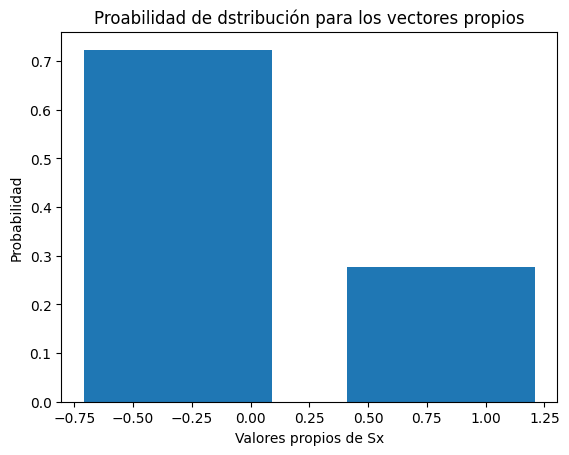

In [43]:
import numpy as np
import matplotlib.pyplot as plt

Sx = 0.5 * np.array([[0, 1], [1, 1]], dtype=complex)
spinArriba = np.array([1, 0], dtype=complex)


eigenvalues, eigenvectors = np.linalg.eigh(Sx)
spinArriba_normal = spinArriba / np.linalg.norm(spinArriba)

probabilidades = [np.abs(np.vdot(eigenvector, spinArriba_normal))**2 for eigenvector in eigenvectors.T]

for i, (eigenvalue, probability) in enumerate(zip(eigenvalues, probabilidades)):
    print(f"Valor propio {i+1}: {eigenvalue}, Probabilidad: {probability}")

plt.bar(eigenvalues, probabilidades)
plt.xlabel('Valores propios de Sx')
plt.ylabel('Probabilidad')
plt.title('Proabilidad de dstribución para los vectores propios')
plt.show()

## Ejercicio 4.4.1
Verify that the given matrices are unitary matrices. Multiply them and verify that their product is also unitary.

In [47]:
def es_Unitaria(matriz):
    identidad = np.eye(matriz.shape[0])  #Crea la identidad
    matriz_con_trans = np.conjugate(matriz.T)
    product = np.dot(matriz_con_trans, matriz)

    return np.allclose(product, identidad)

def main():
    U1 = np.array([[2, 2], [-2, 2]], dtype=complex)
    U2 = np.array([[np.sqrt(2), np.sqrt(2)], [np.sqrt(2), -np.sqrt(2)]], dtype=complex)
    #Ejemplo 2
    #U1 = np.array([[0, 1], [1, 0]], dtype=complex)
    #U2 = (1/np.sqrt(2)) * np.array([[1, 1], [1, -1]], dtype=complex)
    
    print("U1 es unitaria? ", es_Unitaria(U1))
    print("U2 es unitaria?", es_Unitaria(U2))
    
    producto = np.dot(U1, U2)
    
    # Check if their product is unitary
    print("Producto de U1 y U2:\n", producto)
    print("Es el producto unitario?", es_Unitaria(producto))
main ()

U1 es unitaria?  False
U2 es unitaria? False
Producto de U1 y U2:
 [[ 5.65685425+0.j  0.        +0.j]
 [ 0.        +0.j -5.65685425+0.j]]
Es el producto unitario? False


## Ejercicio 4.4.2
Go back to Example 3.3.2 (quantum billiard ball), keep the same initial state vector [1, 0, 0, 0]T , but change the unitary map to
Determine the state of the system after three time steps. What is the chance of the quantum ball to be found at point 3?

In [50]:
import numpy as np

U = np.array([[0, 1/np.sqrt(2), 1/np.sqrt(2), 0],
              [1j/np.sqrt(2), 0, 0, 1/np.sqrt(2)],
              [1/np.sqrt(2), 0, 0, 0],
              [0, 1/np.sqrt(2), -1/np.sqrt(2), 0]], dtype=complex)

estado = np.array([1, 0, 0, 0], dtype=complex)

for _ in range(3):
    estado = np.dot(U, estado)

print("Estado del sistema después de tres pasos:")
print(estado)

probabilidadBola_punto3 = np.abs(estado[2])**2
print(f"Probabilidad de encontrar la bola cuántica en la posición 3: {probabilidadBola_punto3}")

Estado del sistema después de tres pasos:
[ 0.        +0.j         -0.70710678+0.70710678j  0.35355339+0.35355339j
  0.        +0.j        ]
Probabilidad de encontrar la bola cuántica en la posición 3: 0.2499999999999999
